## Essential Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import gridspec
sb.set()

## Raw Data Acqusition

In [2]:
#Importing Raw Data from csv file
initialData = pd.read_csv('AviationData.csv', engine='python')
initialData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


In [3]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
Event.Id                  84262 non-null object
Investigation.Type        84257 non-null object
Accident.Number           84262 non-null object
Event.Date                84262 non-null object
Location                  84185 non-null object
Country                   83755 non-null object
Latitude                  30163 non-null float64
Longitude                 30154 non-null float64
Airport.Code              47723 non-null object
Airport.Name              50439 non-null object
Injury.Severity           84262 non-null object
Aircraft.Damage           81553 non-null object
Aircraft.Category         27508 non-null object
Registration.Number       80412 non-null object
Make                      84192 non-null object
Model                     84163 non-null object
Amateur.Built             83653 non-null object
Number.of.Engines         79228 non-null float64
Engine.Type             

## Visualization

Number of Countries :  179


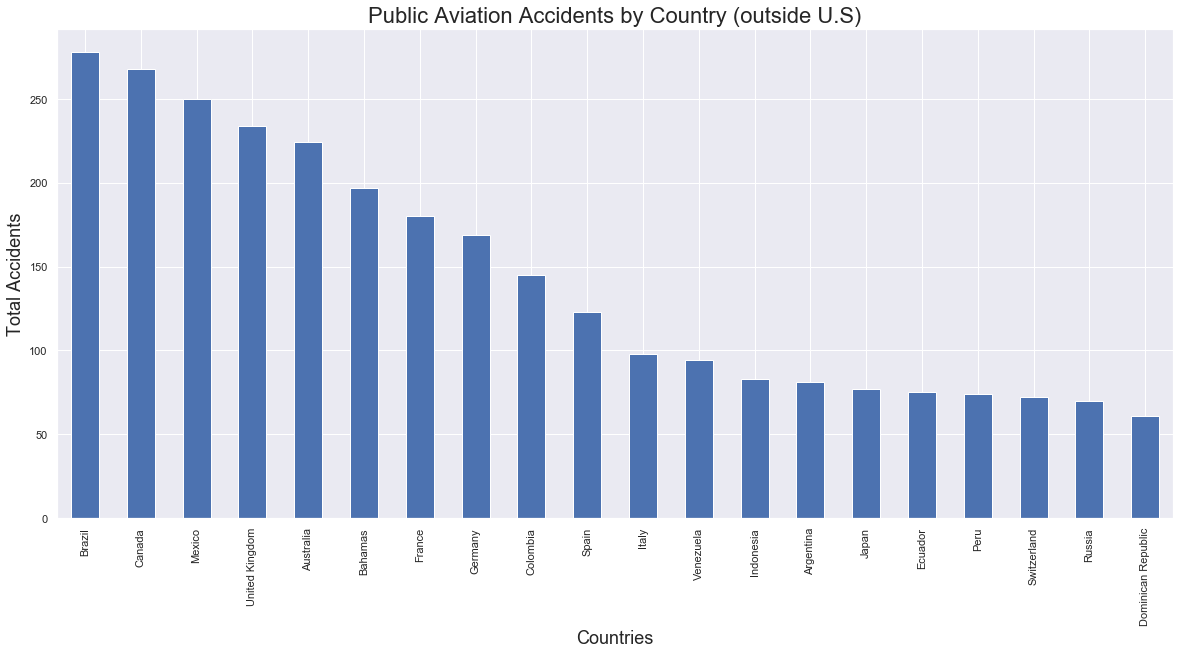

In [4]:
# Plotting aviation accidents for Commercial Airlines
plotData = initialData[(initialData['FAR.Description'] == 'Part 91: General Aviation') |
                       (initialData['FAR.Description'] == 'Non-U.S., Commercial') |
                       (initialData['FAR.Description'] == 'Part 129: Foreign') |
                       (initialData['FAR.Description'] == 'Non-U.S., Non-Commercial') |
                       (initialData['FAR.Description'] == 'Public Aircraft') |
                       (initialData['FAR.Description'] == 'Part 125: 20+ Pax,6000+ lbs') |
                       (initialData['FAR.Description'] == 'Public Use') |
                       (initialData['FAR.Description'].notnull()==False)]
print("Number of Countries : ", len(plotData['Country'].unique()))

top20 = plotData['Country'].value_counts()[1:21]
f, axes = plt.subplots(1, 1, figsize=(20,9))
top20.plot.bar()
axes.set_title("Public Aviation Accidents by Country (outside U.S)", fontsize=22)
axes.set_xlabel("Countries", fontsize=18)
_ = axes.set_ylabel("Total Accidents", fontsize=18)

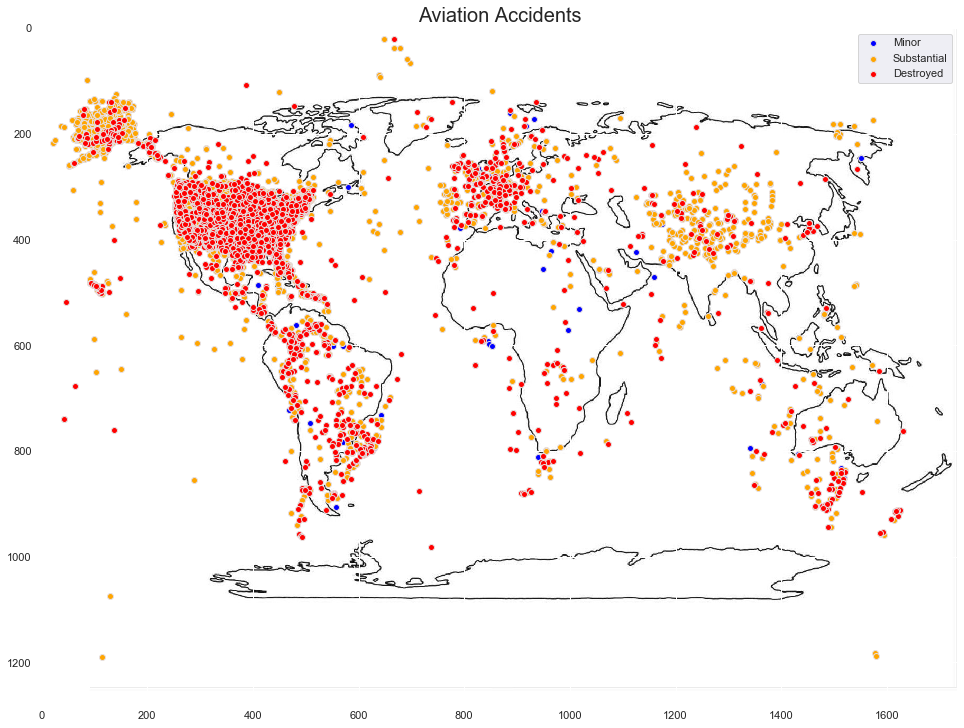

In [5]:
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

# Display a World Map to visualize data for total accidents
f, axes = plt.subplots(1, 1, figsize=(16.42, 12.75))
img = mpimg.imread('WorldMap.jpg')
imgplt = plt.imshow(img)

# Converting Latitude and Longitude values to X and y co-ordinates for World Map
plotData = initialData[(initialData['Longitude'].notnull()) & (initialData['Latitude'].notnull()) & 
                       (initialData['Aircraft.Damage'].notnull())]
xPt = plotData['Longitude'].tolist()
yPt = plotData['Latitude'].tolist()
aDam = plotData['Aircraft.Damage'].tolist()
xPt_minor = []; yPt_minor = []
xPt_sub = []; yPt_sub = []
xPt_dest = []; yPt_dest = []
for i in range(len(xPt)):
    xPt[i] = (int)((180 + xPt[i])*(1642/360.0))
    yPt[i] = (int)((90 - yPt[i])*(1275/180.0))
    if(xPt[i]>1630):
        xPt[i] -= 15
    if(yPt[i]<15):
        yPt[i] += 10
    elif (aDam[i]=='Minor'):
        xPt_minor.append(xPt[i])
        yPt_minor.append(yPt[i])
    elif (aDam[i]=='Substantial'):
        xPt_sub.append(xPt[i])
        yPt_sub.append(yPt[i])
    elif (aDam[i]=='Destroyed'):
        xPt_dest.append(xPt[i])
        yPt_dest.append(yPt[i])

plt.scatter(x=xPt_minor, y=yPt_minor, c='blue', label='Minor', edgecolors='#e6dfdf')
plt.scatter(x=xPt_sub, y=yPt_sub, c='orange', label='Substantial', edgecolors='#e6dfdf')
plt.scatter(x=xPt_dest, y=yPt_dest, c='red', label='Destroyed', edgecolors='#e6dfdf')
plt.legend(loc='upper right')

plt.title('Aviation Accidents', size=20)
plt.show()

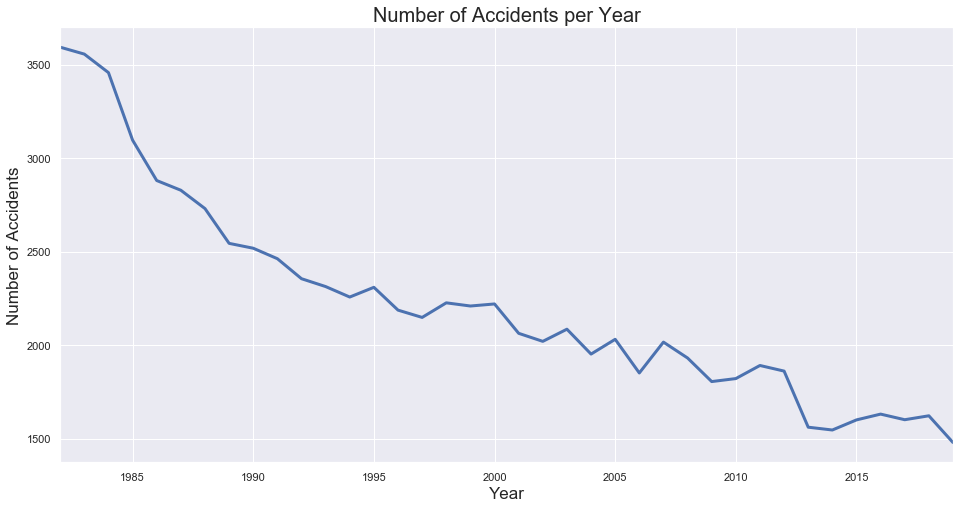

In [6]:
# Plotting a Time Series to view the number of accidents occured in each year
plotData = pd.DataFrame(columns=['Year','Count'])
i = 0

from collections import Counter
yrCount = Counter([date.year for date in pd.to_datetime(initialData['Event.Date'])])
for yr, count in dict(yrCount).items():
    plotData.loc[i] = [int(yr)] + [count]
    i += 1
plotData = plotData[plotData['Year']>1981]

f, axes = plt.subplots(1,1,figsize=(16,8))
plotData.plot(x='Year', y='Count', ax=axes, linewidth=3)
axes.set_xlabel('Year', size=17)
axes.set_ylabel('Number of Accidents', size=17)
axes.get_legend().remove()
_ = axes.set_title('Number of Accidents per Year', size=20)

As seen in the plot, the number of accidents has reduced indicative of improving technology and safety standards throughout the years. However, we would like to further reduce the number of fatal or injuries caused by an aircraft accident. By using the model to train and predict injury severity, we can improve the aircraft before an accident occurs.

## Exploratory Analysis

##### Aim: Develop a model to predict the Aircraft Damage and Injury Severity based on aircraft features/circumstances
Firstly, the various aircraft features will be examined and find relevant features that can be used as strong predictors for Aircraft Damage and Injury Severity.

##### 5 Factors affecting Aircraft Damage

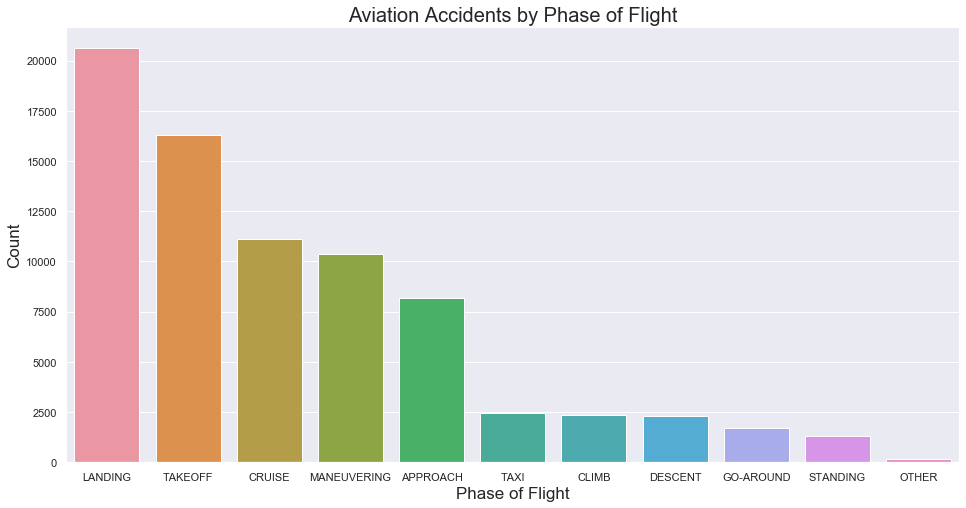

In [7]:
# 1. Phase of Flight
f, axes = plt.subplots(1,1,figsize=(16,8))
plotData = initialData[(initialData['Broad.Phase.of.Flight'].notnull()) & (initialData['Broad.Phase.of.Flight']!='UNKNOWN') ]
sb.countplot(x='Broad.Phase.of.Flight', data=plotData, order = plotData['Broad.Phase.of.Flight'].value_counts().index, ax=axes)
axes.set_xlabel('Phase of Flight', size=17)
axes.set_ylabel('Count', size=17)
_ = axes.set_title('Aviation Accidents by Phase of Flight', size=20)

Phase of Flight seems to be a good predictor as the probability of the aircraft accident is higher during Landing, Takeoff, Cruise etc. as compared to Taxi, Climb, Descent etc.

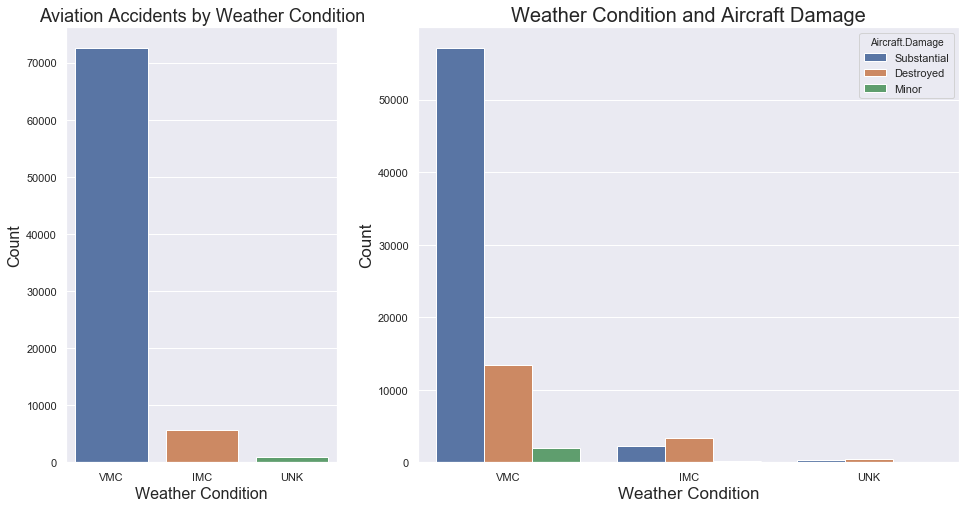

In [8]:
# 2. Weather Condition
plotData = initialData[(initialData['Weather.Condition'].notnull()) & (initialData['Aircraft.Damage'].notnull())]

fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

ax0 = plt.subplot(gs[0])
sb.countplot(x='Weather.Condition', data=plotData, order=plotData['Weather.Condition'].value_counts().index, ax=ax0)
ax0.set_xlabel('Weather Condition', size=16)
ax0.set_ylabel('Count', size=16)
ax0.set_title('Aviation Accidents by Weather Condition', size=18)

ax1 = plt.subplot(gs[1])
sb.countplot(x='Weather.Condition', data=plotData, hue='Aircraft.Damage', ax=ax1)
ax1.set_xlabel('Weather Condition', size=17)
ax1.set_ylabel('Count', size=17)
_ = ax1.set_title('Weather Condition and Aircraft Damage', size=20)

Weather Condition shows that flights in VMC have a higher probability of accident (probably due to lower err rate of machines). However, aircraft in IMC have faced greater aircraft damage (probably due to lack of robustness).

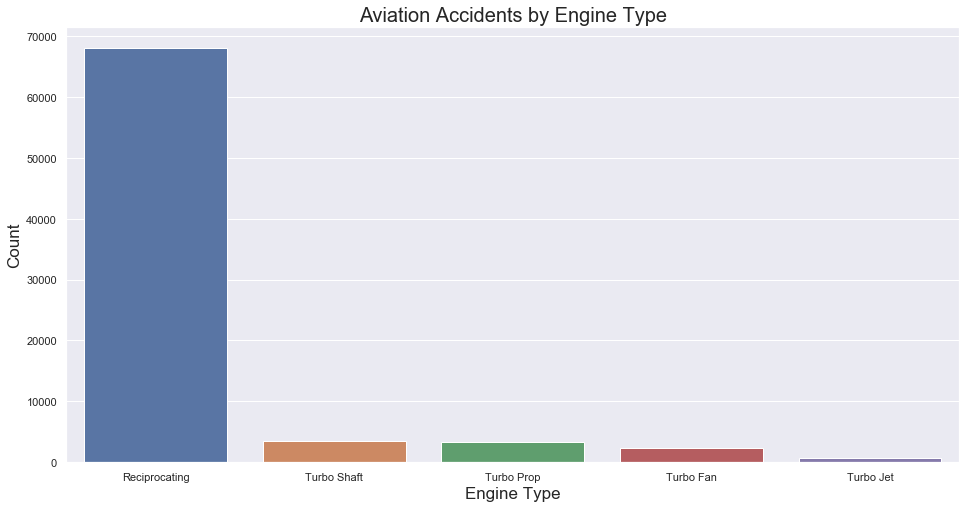

In [9]:
# 3. Engine Type
plotData = initialData[(initialData['Engine.Type'] == 'Reciprocating') |
                       (initialData['Engine.Type'] == 'Turbo Shaft') |
                       (initialData['Engine.Type'] == 'Turbo Prop') |
                       (initialData['Engine.Type'] == 'Turbo Fan') |
                       (initialData['Engine.Type'] == 'Turbo Jet')]

f, axes = plt.subplots(1,1,figsize=(16,8))
sb.catplot(x="Engine.Type", data=plotData, kind="count", order=plotData["Engine.Type"].value_counts().index, ax=axes)
axes.set_xlabel('Engine Type', size=17)
axes.set_ylabel('Count', size=17)
axes.set_title('Aviation Accidents by Engine Type', size=20)
plt.close(2)

Clearly, Reciprocating Engine has the highest chance of failure and hence highest probability of accident.

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


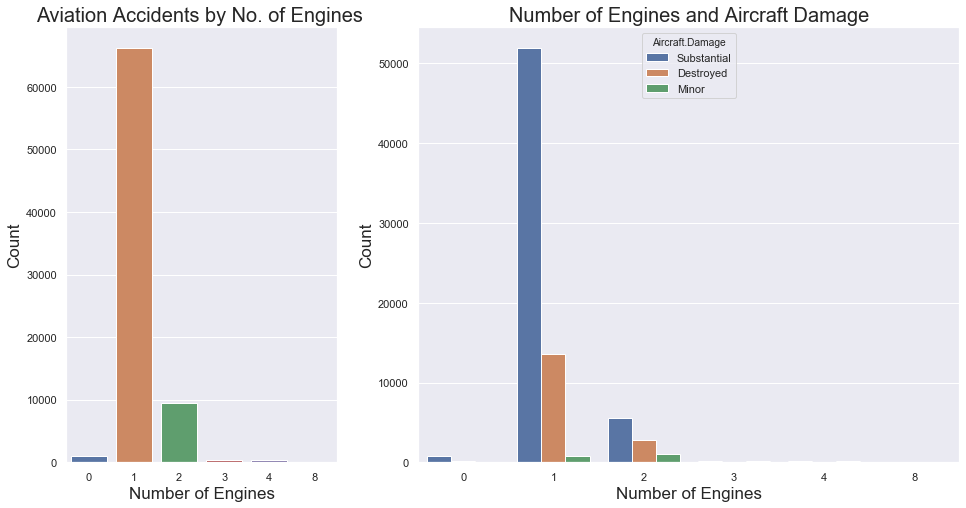

In [10]:
# 4. Number of Engines
plotData = initialData[(initialData['Number.of.Engines'].notnull()) & (initialData['Aircraft.Damage'].notnull())]
plotData['Number.of.Engines'] = plotData['Number.of.Engines'].astype('int64')

fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

ax0 = plt.subplot(gs[0])
sb.catplot(x="Number.of.Engines", data=plotData, kind="count", ax=ax0)
ax0.set_xlabel('Number of Engines', size=17)
ax0.set_ylabel('Count', size=17)
ax0.set_title('Aviation Accidents by No. of Engines ', size=20)
plt.close(2)

ax1 = plt.subplot(gs[1])
sb.catplot(x="Number.of.Engines", data=plotData, hue='Aircraft.Damage', kind="count", ax=ax1)
ax1.set_xlabel('Number of Engines', size=17)
ax1.set_ylabel('Count', size=17)
ax1.set_title('Number of Engines and Aircraft Damage', size=20)
plt.close(2)

A single engine aircraft is more prone to accident than a multi-engine aircraft because of higher redundancy. However, having two-engine aircraft nowadays are incredibly safe that the additional safety from adding extra engines is marginal.

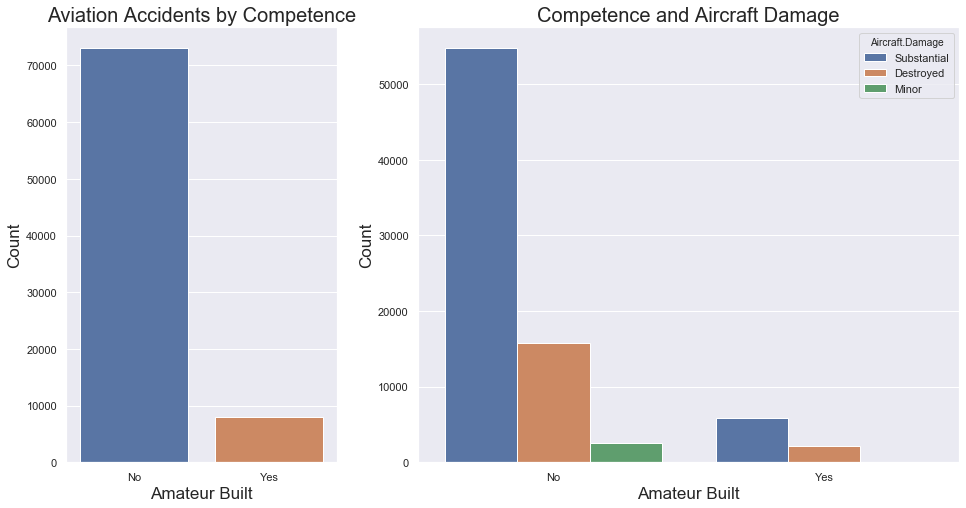

In [11]:
# 5. Amateur Built
plotData = initialData[(initialData['Amateur.Built'].notnull()) & (initialData['Aircraft.Damage'].notnull())]

fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,2]) 

ax0 = plt.subplot(gs[0])
sb.catplot(x="Amateur.Built", data=plotData, kind="count", order=plotData["Amateur.Built"].value_counts().index, ax=ax0)
ax0.set_xlabel('Amateur Built', size=17)
ax0.set_ylabel('Count', size=17)
ax0.set_title('Aviation Accidents by Competence', size=20)
plt.close(2)

ax1 = plt.subplot(gs[1])
sb.catplot(x="Amateur.Built", data=plotData, kind="count", hue='Aircraft.Damage', ax=ax1)
ax1.set_xlabel('Amateur Built', size=17)
ax1.set_ylabel('Count', size=17)
ax1.set_title('Competence and Aircraft Damage', size=20)
plt.close(2)

Although higher competence shows a higher probability of an accident, we assume this may be because of dataset bias. However, from the 2nd graph, aircrafts built by amateurs usually sustain greater Aircraft Damage.

##### 4 Factors affecting Injury Severity

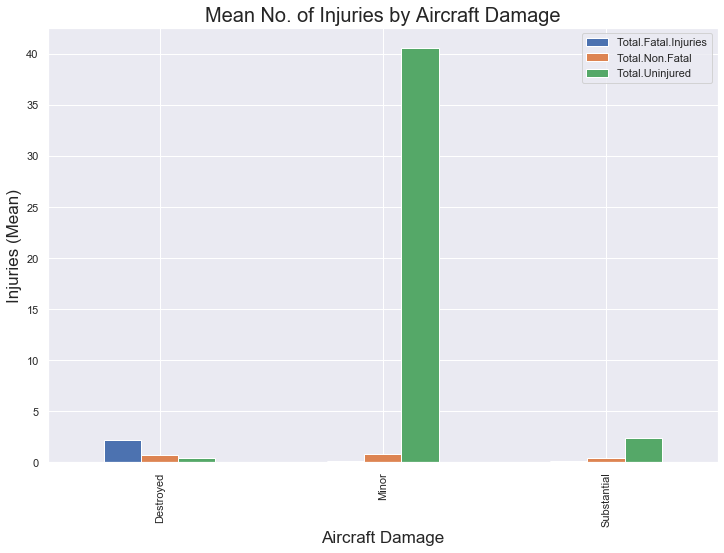

In [12]:
# 1. Aircraft Damage
plotData = initialData.copy()
plotData['Total.Fatal.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Serious.Injuries'] .fillna(value=0, inplace=True)
plotData['Total.Minor.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Uninjured']        .fillna(value=0, inplace=True)

plotData = plotData[(plotData['Aircraft.Damage'].notnull()) | (plotData['Aircraft.Damage'] != 'Unknown')]
Total_Non_Fatal = plotData["Total.Serious.Injuries"] + plotData["Total.Minor.Injuries"]
plotData["Total.Non.Fatal"] = Total_Non_Fatal

x = plotData[["Aircraft.Damage", "Total.Fatal.Injuries", "Total.Non.Fatal", "Total.Uninjured"]]
x = x.set_index('Aircraft.Damage').groupby('Aircraft.Damage').mean()

f, axes = plt.subplots(1, 1, figsize=(12,8))
x.plot.bar(ax=axes)
axes.set_title("Mean No. of Injuries by Aircraft Damage", fontsize=20)
axes.set_xlabel("Aircraft Damage", fontsize=17)
_ = axes.set_ylabel("Injuries (Mean)", fontsize=17)

Above plot shown that, in cases where aircraft damage is minor, the number of uninjured passengers would be higher. The vice-versa also holds.

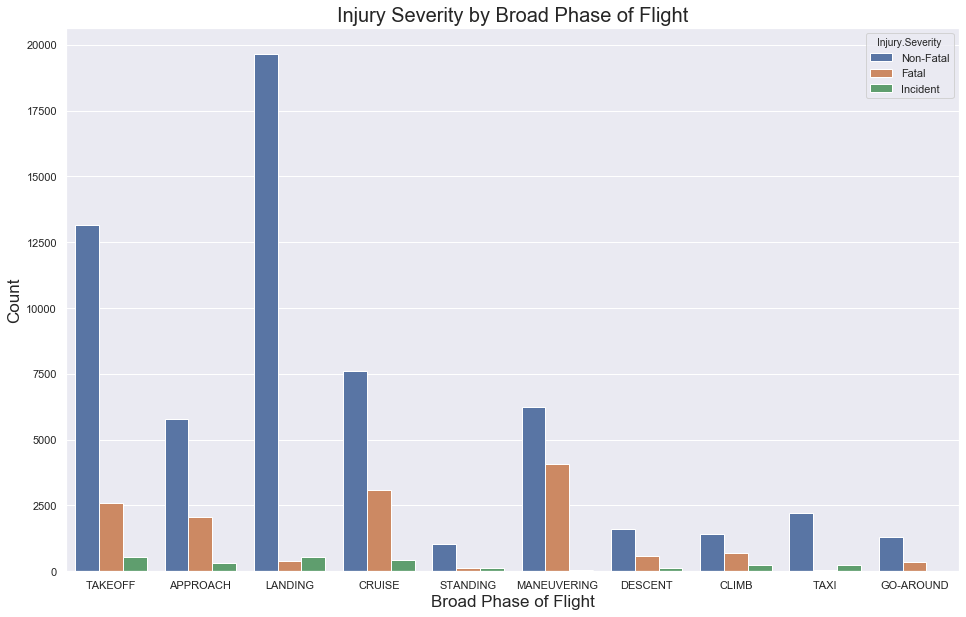

In [13]:
# 2. Broad Phase of Flight
plotData = initialData.copy()
plotData['Total.Fatal.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Serious.Injuries'] .fillna(value=0, inplace=True)
plotData['Total.Minor.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Uninjured']        .fillna(value=0, inplace=True)

plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\d+','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\(','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\)','')

plotData = plotData[(plotData['Broad.Phase.of.Flight'].notnull()) & (plotData['Broad.Phase.of.Flight'] != 'UNKNOWN') & 
                    (plotData['Broad.Phase.of.Flight'] != 'OTHER') & (plotData['Injury.Severity']!='Unavailable')]

f, axes = plt.subplots(1, 1, figsize=(16,10))
sb.catplot(x="Broad.Phase.of.Flight", data=plotData, hue='Injury.Severity', kind="count", ax=axes)
axes.set_xlabel('Broad Phase of Flight', size=17)
axes.set_ylabel('Count', size=17)
axes.set_title('Injury Severity by Broad Phase of Flight', size=20)
plt.close(2)

Through observation, the closer the aircraft is to the ground, the lower the severity of injuries. Thus, for Takeoff and Landing, the non-fatal accidents were highest. Also, for Maneuvring and Cruise, the fatal accidents were highest.

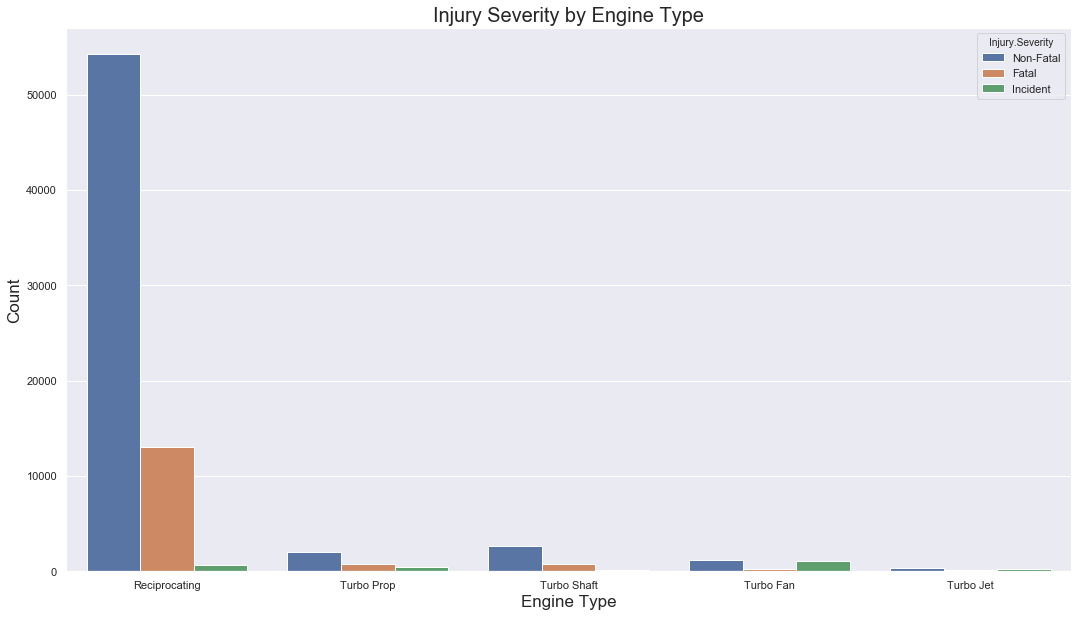

In [14]:
# 3. Engine Type
plotData = initialData.copy()
plotData['Total.Fatal.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Serious.Injuries'] .fillna(value=0, inplace=True)
plotData['Total.Minor.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Uninjured']        .fillna(value=0, inplace=True)
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\d+','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\(','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\)','')

plotData = plotData[((plotData['Engine.Type'] == 'Reciprocating') | (plotData['Engine.Type'] == 'Turbo Prop') | 
                    (plotData['Engine.Type'] == 'Turbo Shaft') | (plotData['Engine.Type'] == 'Turbo Fan') | 
                    (plotData['Engine.Type'] == 'Turbo Jet')) & (plotData['Injury.Severity']!='Unavailable')]

f, axes = plt.subplots(1, 1, figsize=(18,10))
sb.catplot(x="Engine.Type", data=plotData, hue='Injury.Severity', kind="count", ax=axes)
axes.set_xlabel('Engine Type', size=17)
axes.set_ylabel('Count', size=17)
axes.set_title('Injury Severity by Engine Type', size=20)
plt.close(2)

As shown in the plot, Reciprocating engine has the highest number of non-fatal and fatal compared to other engines. But at the same time, this can also due to data bias.

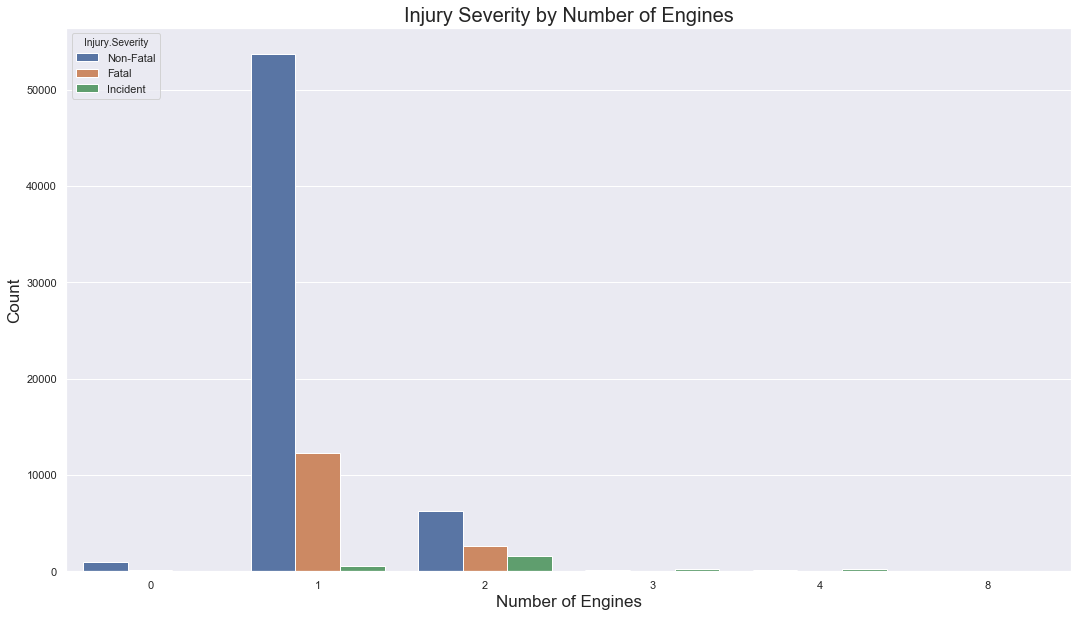

In [15]:
# 4. Number of Engines
plotData = initialData.copy()
plotData['Total.Fatal.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Serious.Injuries'] .fillna(value=0, inplace=True)
plotData['Total.Minor.Injuries']   .fillna(value=0, inplace=True)
plotData['Total.Uninjured']        .fillna(value=0, inplace=True)
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\d+','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\(','')
plotData['Injury.Severity'] = plotData['Injury.Severity'].str.replace('\)','')

plotData = plotData[plotData['Number.of.Engines'].notnull() & (plotData['Injury.Severity']!='Unavailable')]
plotData['Number.of.Engines'] = plotData['Number.of.Engines'].astype('int64')

f, axes = plt.subplots(1, 1, figsize=(18,10))
sb.catplot(x="Number.of.Engines", data=plotData, hue='Injury.Severity', kind="count", ax=axes)
axes.set_xlabel('Number of Engines', size=17)
axes.set_ylabel('Count', size=17)
axes.set_title('Injury Severity by Number of Engines', size=20)
plt.close(2)

With the observation of the previous result from the 'Aircraft Damage vs Number of Engines' plot, we could say that single-engine has the highest number of accidents compared to multi-engines. Which, also attributable to the high number of injuries count in the above plot.

## Data Cleaning and Preparation

In [17]:
trainData = initialData.copy()

# Removing irrelevant variables
# Event.Id will be used as the index for the table
trainData = trainData.drop(['Accident.Number','Airport.Code','Airport.Name','Registration.Number','Air.Carrier', 'Country',
                            'Make','Model','Schedule','Report.Status','Publication.Date','Latitude','Longitude'], axis=1)

# Using only accident reports, not incident reports
trainData = trainData[trainData['Investigation.Type']=='Accident']
del trainData['Investigation.Type']

In [20]:
# Filling missing values with default or 0
trainData['Total.Fatal.Injuries']   .fillna(value=0, inplace=True)
trainData['Total.Serious.Injuries'] .fillna(value=0, inplace=True)
trainData['Total.Minor.Injuries']   .fillna(value=0, inplace=True)
trainData['Total.Uninjured']        .fillna(value=0, inplace=True)

trainData['Weather.Condition']      .fillna(value='UNK', inplace=True)
trainData['Broad.Phase.of.Flight']  .fillna(value='OTHER', inplace=True)
trainData['Amateur.Built']          .fillna(value='No', inplace=True)
trainData['Engine.Type']            .fillna(value='Unknown', inplace=True)
trainData['FAR.Description']        .fillna(value='Unknown', inplace=True)
trainData['Purpose.of.Flight']      .fillna(value='Unknown', inplace=True)
trainData['Aircraft.Damage']        .fillna(value='Unknown', inplace=True)
trainData['Aircraft.Category']      .fillna(value='Unknown', inplace=True)
trainData['Injury.Severity'] = trainData['Injury.Severity'].str.replace('\d+','')
trainData['Injury.Severity'] = trainData['Injury.Severity'].str.replace('\(','')
trainData['Injury.Severity'] = trainData['Injury.Severity'].str.replace('\)','')

# Remove any remaining null rows
trainData = trainData.dropna(how='any')

# Change the data type of variables
trainData['Event.Date']             = trainData['Event.Date']             .astype('datetime64')
trainData['Total.Fatal.Injuries']   = trainData['Total.Fatal.Injuries']   .astype('int64')
trainData['Total.Serious.Injuries'] = trainData['Total.Serious.Injuries'] .astype('int64')
trainData['Total.Minor.Injuries']   = trainData['Total.Minor.Injuries']   .astype('int64')
trainData['Total.Uninjured']        = trainData['Total.Uninjured']        .astype('int64')
trainData['Number.of.Engines']      = trainData['Number.of.Engines']      .astype('int64')
trainData['Weather.Condition']      = trainData['Weather.Condition']      .astype('category')
trainData['Broad.Phase.of.Flight']  = trainData['Broad.Phase.of.Flight']  .astype('category')
trainData['Amateur.Built']          = trainData['Amateur.Built']          .astype('category')
trainData['Engine.Type']            = trainData['Engine.Type']            .astype('category')
trainData['FAR.Description']        = trainData['FAR.Description']        .astype('category')
trainData['Purpose.of.Flight']      = trainData['Purpose.of.Flight']      .astype('category')
trainData['Aircraft.Damage']        = trainData['Aircraft.Damage']        .astype('category')
trainData['Aircraft.Category']      = trainData['Aircraft.Category']      .astype('category')
trainData['Injury.Severity']        = trainData['Injury.Severity']        .astype('category')

In [21]:
# Using only the 5 major Engine Types
trainData = trainData[ (trainData['Engine.Type'] == 'Reciprocating') | (trainData['Engine.Type'] == 'Turbo Shaft') |
                       (trainData['Engine.Type'] == 'Turbo Prop') | (trainData['Engine.Type'] == 'Turbo Fan') |
                       (trainData['Engine.Type'] == 'Turbo Jet') ]

In [22]:
# Removing data where the predictors are unknown
trainData = trainData[(trainData['Aircraft.Damage'] != 'Unknown')]
trainData = trainData[(trainData['Injury.Severity'] != 'Unavailable')]

# Resetting Index for Dataset
trainData = trainData.reset_index(drop=True)

In [23]:
print("Clean Data size: ",trainData.shape, end='\n\n')
trainData.info()

Clean Data size:  (74013, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74013 entries, 0 to 74012
Data columns (total 17 columns):
Event.Id                  74013 non-null object
Event.Date                74013 non-null datetime64[ns]
Location                  74013 non-null object
Injury.Severity           74013 non-null category
Aircraft.Damage           74013 non-null category
Aircraft.Category         74013 non-null category
Amateur.Built             74013 non-null category
Number.of.Engines         74013 non-null int64
Engine.Type               74013 non-null category
FAR.Description           74013 non-null category
Purpose.of.Flight         74013 non-null category
Total.Fatal.Injuries      74013 non-null int64
Total.Serious.Injuries    74013 non-null int64
Total.Minor.Injuries      74013 non-null int64
Total.Uninjured           74013 non-null int64
Weather.Condition         74013 non-null category
Broad.Phase.of.Flight     74013 non-null category
dtypes: category(9), da

## Model Training and Predicition

This is clarified as Classification prediction. We will train two models using Logistic Regression and Random Forest Classifier. Then we will choose the model that achieves the highest accuracy.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

##### Predicting Aircraft Damage

In [41]:
y = pd.DataFrame(trainData['Aircraft.Damage']) # Response variable
X = pd.DataFrame(trainData[['Number.of.Engines', 'Broad.Phase.of.Flight', 'Weather.Condition', 
                            'Engine.Type', 'Amateur.Built']]) # Predictor variables

# Encoding the categorical variables to feed into Machine Learning models
for i in ['Broad.Phase.of.Flight', 'Weather.Condition', 'Engine.Type', 'Amateur.Built']:
    X[i] = X[i].cat.codes
X.head()

,Number.of.Engines,Broad.Phase.of.Flight,Weather.Condition,Engine.Type,Amateur.Built
0,1,9,2,6,0
1,1,9,2,6,0
2,2,9,0,10,0
3,1,0,2,11,0
4,1,0,1,6,0


In [42]:
# Random Train-Test split
# Same Train and Test datasets will be used for the two models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
# Logistic Regression Model (solver:lbfgs and multi-class:'one versus rest')
modelAircraftDamage1 = LogisticRegression(solver='lbfgs', multi_class='ovr')
modelAircraftDamage1.fit(X_train, y_train)
print('Logistic Regression Accuracy \t Train Dataset')
print("Classification Accuracy:\t", modelAircraftDamage1.score(X_train, y_train))
print('Logistic Regression Accuracy \t Test Dataset')
print("Classification Accuracy:\t", modelAircraftDamage1.score(X_test, y_test))

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy 	 Train Dataset
Classification Accuracy:	 0.7858976524235771
Logistic Regression Accuracy 	 Test Dataset
Classification Accuracy:	 0.7911234209281902


In [44]:
# Random Forest Classifier Model
modelAircraftDamage2 = RandomForestClassifier()
modelAircraftDamage2.fit(X_train, y_train)
print('Random Forest Classifier Accuracy \t Train Dataset')
print("Classification Accuracy:\t\t", modelAircraftDamage2.score(X_train, y_train))
print('Random Forest Classifier Accuracy \t Test Dataset')
print("Classification Accuracy:\t\t", modelAircraftDamage2.score(X_test, y_test))

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Classifier Accuracy 	 Train Dataset
Classification Accuracy:		 0.799577774024658
Random Forest Classifier Accuracy 	 Test Dataset
Classification Accuracy:		 0.8030804566641897


In [45]:
# Comparing the two models to get a better Machine Learning Performance
if modelAircraftDamage2.score(X_test, y_test) >= modelAircraftDamage1.score(X_test, y_test):
    AircraftDamage_Pred = pd.DataFrame(modelAircraftDamage2.predict(X))
    print('Using Random Forest Classifier Model for predictions')
else:
    AircraftDamage_Pred = pd.DataFrame(modelAircraftDamage1.predict(X))
    print('Using Logistic Regression Model for predictions')

Using Random Forest Classifier Model for predictions


###### Predicting Injury Severity

In [46]:
y = pd.DataFrame(trainData['Injury.Severity']) # Response Variable
X = pd.DataFrame(trainData[['Broad.Phase.of.Flight','Engine.Type','Number.of.Engines']]) # Predictor variables
X['Aircraft.Damage.Pred'] = AircraftDamage_Pred # Using Aircraft Damage prediction (from previous step) as predictor
X['Aircraft.Damage.Pred'] = X['Aircraft.Damage.Pred'].astype('category')

# Encoding the categorical variables to feed into Machine Learning models
for i in ['Broad.Phase.of.Flight','Engine.Type','Aircraft.Damage.Pred']:
    X[i] = X[i].cat.codes
X.head()

,Broad.Phase.of.Flight,Engine.Type,Number.of.Engines,Aircraft.Damage.Pred
0,9,6,1,2
1,9,6,1,2
2,9,10,2,2
3,0,11,1,2
4,0,6,1,0


In [47]:
# Random Train-Test split
# Same Train and Test datasets will be used for the two models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
# Logistic Regression Model (solver:lbfgs and multi-class:'one versus rest')
modelInjurySeverity1 = LogisticRegression(solver='lbfgs', multi_class='ovr')
modelInjurySeverity1.fit(X_train, y_train)
print('Logistic Regression Accuracy \t Train Dataset')
print("Classification Accuracy:\t", modelInjurySeverity1.score(X_train, y_train))
print('Logistic Regression Accuracy \t Test Dataset')
print("Classification Accuracy:\t", modelInjurySeverity1.score(X_test, y_test))

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy 	 Train Dataset
Classification Accuracy:	 0.8303327140685695
Logistic Regression Accuracy 	 Test Dataset
Classification Accuracy:	 0.83422279267716


In [49]:
# Random Forest Classifier Model
modelInjurySeverity2 = RandomForestClassifier()
modelInjurySeverity2.fit(X_train, y_train)
print('Random Forest Classifier Accuracy \t Train Dataset')
print("Classification Accuracy:\t\t", modelInjurySeverity2.score(X_train, y_train))
print('Random Forest Classifier Accuracy \t Test Dataset')
print("Classification Accuracy:\t\t", modelInjurySeverity2.score(X_test, y_test))

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Classifier Accuracy 	 Train Dataset
Classification Accuracy:		 0.831464279682486
Random Forest Classifier Accuracy 	 Test Dataset
Classification Accuracy:		 0.83422279267716


In [50]:
# Comparing the two models to get a better Machine Learning Performance
if modelInjurySeverity2.score(X_test, y_test) >= modelInjurySeverity1.score(X_test, y_test):
    print('Using Random Forest Classifier Model for predictions')
else:
    print('Using Logistic Regression Model for predictions')

Using Random Forest Classifier Model for predictions


After comparison, the Random Forest Classifier Model has the highest accuracy compared to the Logistic Regression Model. Hence, the Random Forest Classifier Model will be used for machine learning.